### Data Loading and Preparation

In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
from matplotlib import colors 
import seaborn as sns 

import json


##### Loading JSON data

In [25]:
base_path = '/Users/zak/ArcPrize2025/arc-prize-2025/'

def load_json(file_path):
    with open(file_path, "r") as f: 
        data = json.load(f)


    return data

#### Reading files: 

In [28]:
training_challenges = load_json(base_path +'arc-agi_training_challenges.json')
training_solutions    = load_json(base_path +'arc-agi_training_solutions.json')

evaluation_challenges = load_json(base_path +'arc-agi_evaluation_challenges.json')
evaluation_solutions  = load_json(base_path +'arc-agi_evaluation_solutions.json')

In [44]:
training_challenges["00576224"]

{'train': [{'input': [[7, 9], [4, 3]],
   'output': [[7, 9, 7, 9, 7, 9],
    [4, 3, 4, 3, 4, 3],
    [9, 7, 9, 7, 9, 7],
    [3, 4, 3, 4, 3, 4],
    [7, 9, 7, 9, 7, 9],
    [4, 3, 4, 3, 4, 3]]},
  {'input': [[8, 6], [6, 4]],
   'output': [[8, 6, 8, 6, 8, 6],
    [6, 4, 6, 4, 6, 4],
    [6, 8, 6, 8, 6, 8],
    [4, 6, 4, 6, 4, 6],
    [8, 6, 8, 6, 8, 6],
    [6, 4, 6, 4, 6, 4]]}],
 'test': [{'input': [[3, 2], [7, 8]]}]}

In [45]:
training_challenges["00576224"]["train"]

[{'input': [[7, 9], [4, 3]],
  'output': [[7, 9, 7, 9, 7, 9],
   [4, 3, 4, 3, 4, 3],
   [9, 7, 9, 7, 9, 7],
   [3, 4, 3, 4, 3, 4],
   [7, 9, 7, 9, 7, 9],
   [4, 3, 4, 3, 4, 3]]},
 {'input': [[8, 6], [6, 4]],
  'output': [[8, 6, 8, 6, 8, 6],
   [6, 4, 6, 4, 6, 4],
   [6, 8, 6, 8, 6, 8],
   [4, 6, 4, 6, 4, 6],
   [8, 6, 8, 6, 8, 6],
   [6, 4, 6, 4, 6, 4]]}]

In [46]:
training_challenges["00576224"]["train"][0]

{'input': [[7, 9], [4, 3]],
 'output': [[7, 9, 7, 9, 7, 9],
  [4, 3, 4, 3, 4, 3],
  [9, 7, 9, 7, 9, 7],
  [3, 4, 3, 4, 3, 4],
  [7, 9, 7, 9, 7, 9],
  [4, 3, 4, 3, 4, 3]]}

In [70]:
training_challenges["00576224"]["train"][0]

KeyError: 'train'

In [47]:
training_challenges["00576224"]["train"][1]

{'input': [[8, 6], [6, 4]],
 'output': [[8, 6, 8, 6, 8, 6],
  [6, 4, 6, 4, 6, 4],
  [6, 8, 6, 8, 6, 8],
  [4, 6, 4, 6, 4, 6],
  [8, 6, 8, 6, 8, 6],
  [6, 4, 6, 4, 6, 4]]}

In [48]:
training_challenges["00576224"]["train"][0]["input"]

[[7, 9], [4, 3]]

In [49]:
training_challenges["00576224"]["train"][0]["input"][1]

[4, 3]

In [50]:
len(training_challenges)

1000

In [51]:
# Get a list of all challenge IDs
challenge_ids = list(training_challenges.keys())
print(f"First 5 challenge IDs: {challenge_ids[:5]}")

First 5 challenge IDs: ['00576224', '007bbfb7', '009d5c81', '00d62c1b', '00dbd492']


In [52]:
# Check structure of a single challenge
sample_id = challenge_ids[0]
print(f"Structure of challenge {sample_id}:")
print(training_challenges[sample_id].keys())

Structure of challenge 00576224:
dict_keys(['train', 'test'])


In [53]:
# Count training examples per challenge
training_examples_counts = {}
for challenge_id, challenge_data in training_challenges.items():
    if 'train' in challenge_data:
        training_examples_counts[challenge_id] = len(challenge_data['train'])


In [ ]:
training_challenges["00576224"]["train"]

[{'input': [[7, 9], [4, 3]],
  'output': [[7, 9, 7, 9, 7, 9],
   [4, 3, 4, 3, 4, 3],
   [9, 7, 9, 7, 9, 7],
   [3, 4, 3, 4, 3, 4],
   [7, 9, 7, 9, 7, 9],
   [4, 3, 4, 3, 4, 3]]},
 {'input': [[8, 6], [6, 4]],
  'output': [[8, 6, 8, 6, 8, 6],
   [6, 4, 6, 4, 6, 4],
   [6, 8, 6, 8, 6, 8],
   [4, 6, 4, 6, 4, 6],
   [8, 6, 8, 6, 8, 6],
   [6, 4, 6, 4, 6, 4]]}]

Function to plot input/output pairs of a task

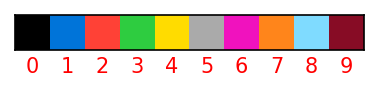

In [56]:
# 0:black, 1:blue, 2:red, 3:green, 4:yellow, # 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown

cmap = colors.ListedColormap( ['#000000', '#0074D9', '#FF4136', '#2ECC40', '#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])

norm = colors.Normalize(vmin =0, vmax=9)

plt.figure(figsize=(3, 1), dpi=150)
plt.imshow([list(range(10))], cmap=cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.tick_params(axis= "x", colors= "r", length= 0, grid_color= "none")

plt.show()

In [79]:
def plot_task(task, task_solutions, i, t, size= 2.5, w1= 0.9):
    t = list(training_challenges)[i]
    titleSize = 16
    num_train = len(task["train"])
    num_test = len(task["test"])

    wn = num_train + num_test
    fig, axs = plt.subplots(2, wn, figsize=(size*wn, 2* size))
    plt.suptitle(f"Task # {i}, {t}", fontsize= titleSize, fontweight= "bold", y=1, color = '#eeeeee')


    ''''train'''
    for j in range(num_train):
        plot_one(axs[0,j], j,task, "train", "input", w = w1)
        plot_one(axs[1,j], j,task, "train", "output", w = w1)

    ''''test'''
    for k in range(num_test):
        plot_one(axs[0, j+k+1], k, task, "test", "input", w = w1)
        task["test"][k]["output"] = task_solutions[k]
        plot_one(axs[1, j+k+1], k, task, "test", "output", w = w1)

    
    axs[1, j+1].set_xticklabels([])
    axs[1, j+1].set_yticklabels([])
    axs[1, j+1] = plt.figure(1).add_subplot(111)
    axs[1, j+1].set_xlim([0, wn])

    '''Separators'''

    colorSeparator = "white"

    for m in range(1, wn):
        axs[1, j+1].plot([m,m], [0,1], "--", linewidth= 1, color= colorSeparator)
    axs[1, j+1].plot([num_train, num_train], [0,1], "--", linewidth= 3, color= colorSeparator)

    axs[1, j+1].axis("off")

    """Frame and Background"""

    fig.patch.set_linewidth(5) #widthframe 
    fig.patch.set_edgecolor(colorSeparator) #colorframe
    fig.patch.set_facecolor("#444444") #background

    plt.tight_layout()

    print(f"#{i}, {t}")
    plt.show()




def plot_one(ax, i, task, train_or_test, input_or_output, solution= None, w= 0.8):
    fs = 12
    input_matix =  task[train_or_test][i][input_or_output]
    ax.imshow(input_matix, cmap=cmap, norm=norm)

    #ax.grid(True,which='both', color='lightgrey', linewidth=1.0)
    plt.setp(plt.gcf().get_axes(), xticklabels=[], yticklabels=[])
    ax.set_xticks([x-0.5 for x in range(1+ len(input_matix[0]))])
    ax.set_yticks([x-0.5 for x in range(1+ len(input_matix))])

    '''Grid:'''
    ax.grid(visible= True, which = 'both', color = '#666666', linewidth = w)
    
    ax.tick_params(axis='both', color='none', length=0)
   
    '''sub title:'''
    ax.set_title(train_or_test + ' ' + input_or_output, fontsize=fs, color = '#dddddd')

    



    

    














### **Visualizing Training set**

000- 100 tasks

#0, 00576224


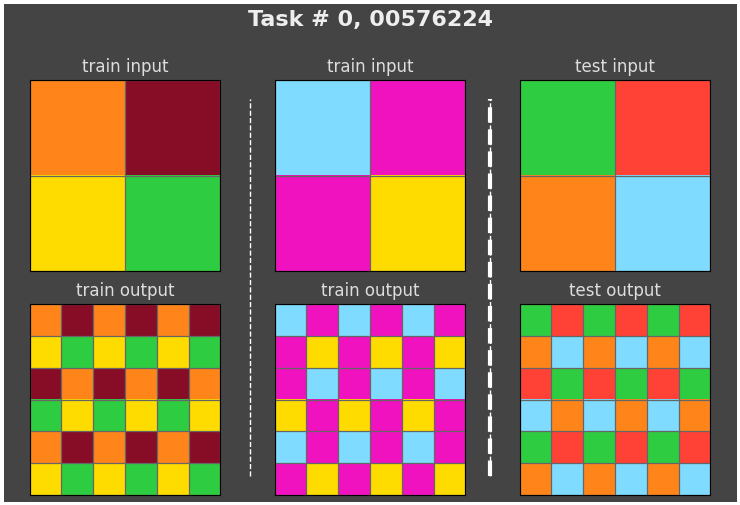

#1, 007bbfb7


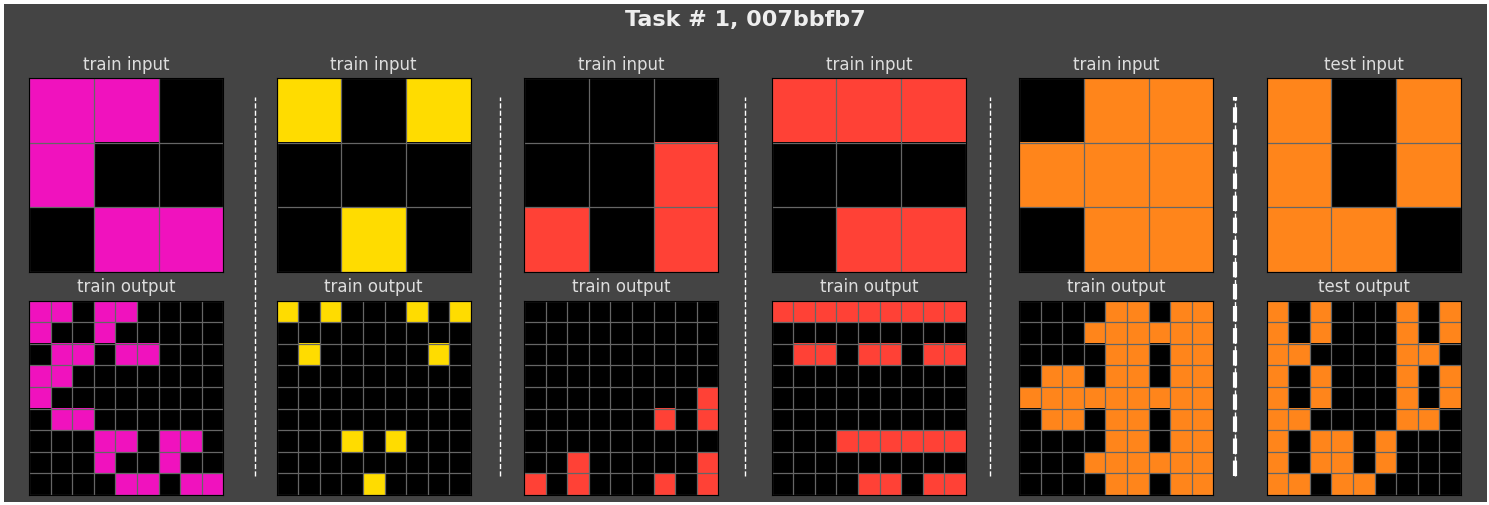

#2, 009d5c81


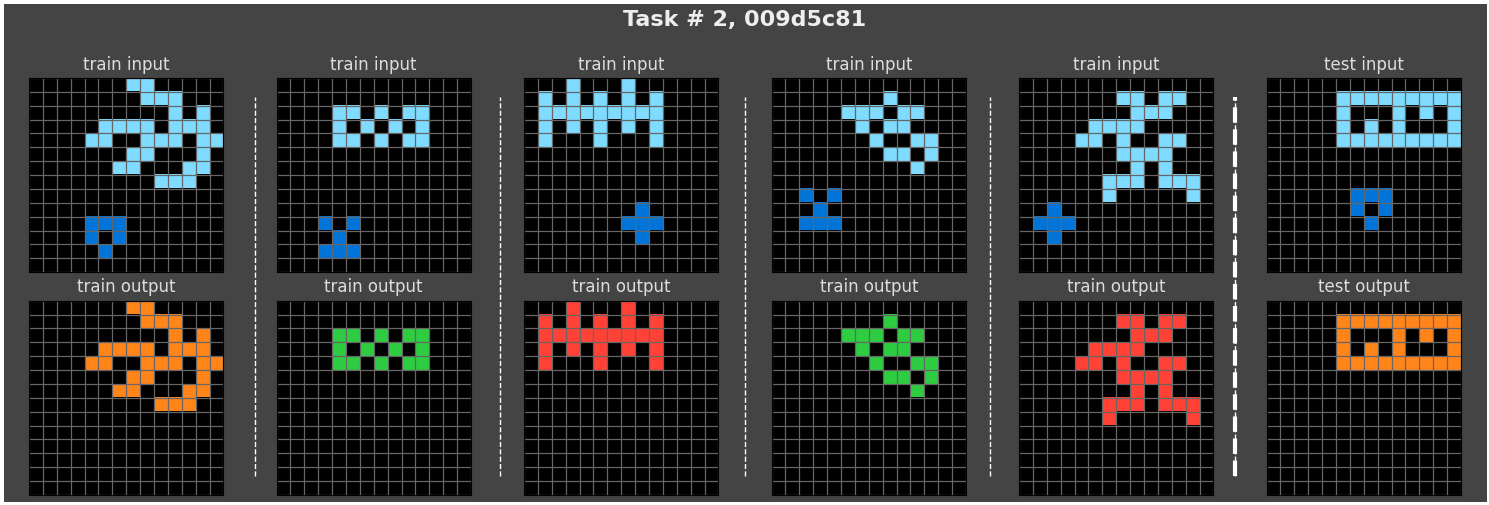

In [81]:
for i in range(0, 3):
    t = list(training_challenges)[i]
    task = training_challenges[t]
    task_solution = training_solutions[t]
    plot_task(task, task_solution, i, t)

### **Visualizing Evaluation set**

tasks 0- 120 


#0, 00576224


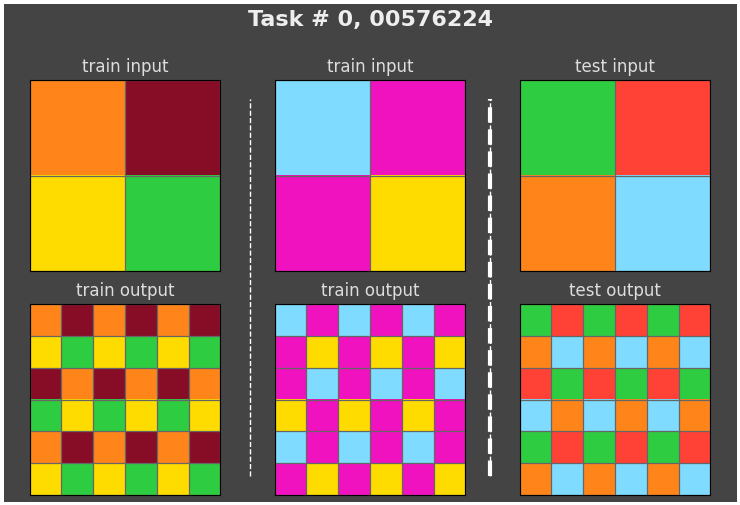

#1, 007bbfb7


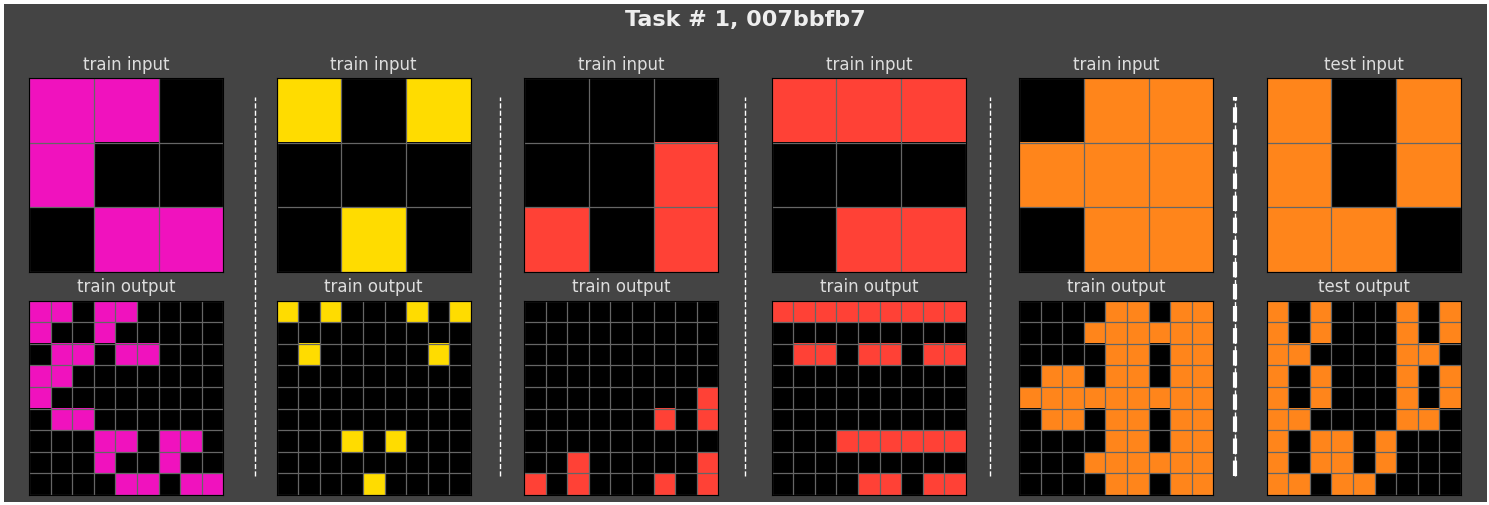

#2, 009d5c81


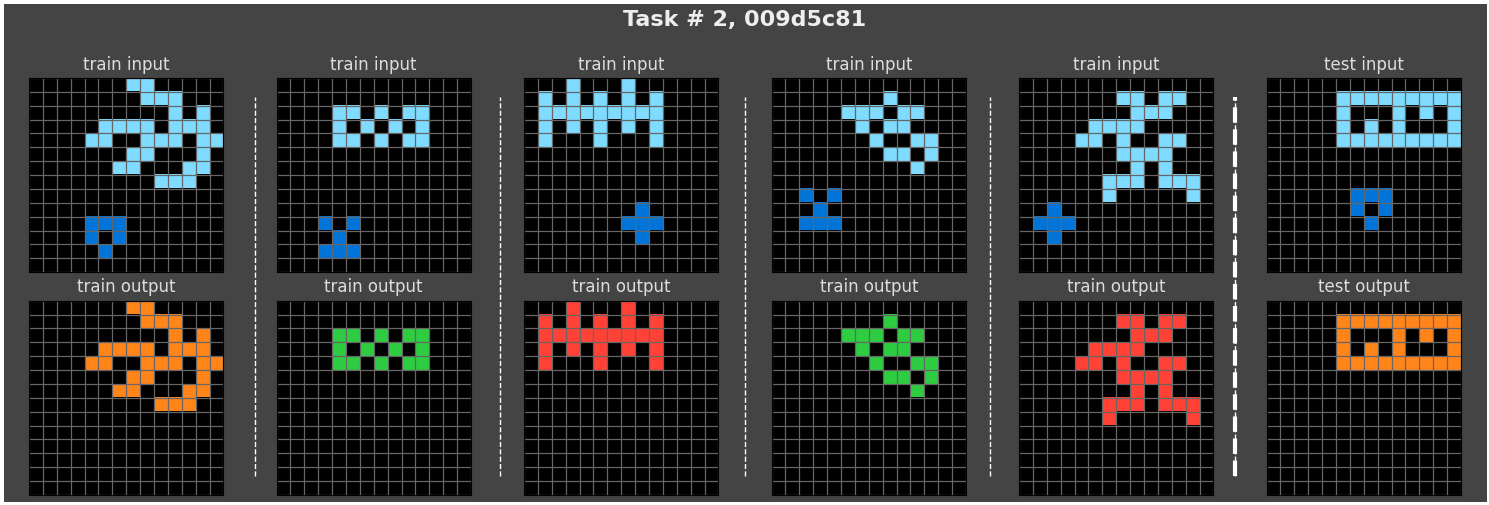

In [82]:
for i in range(0, 3): 
   t = list(training_challenges)[i]
   task = training_challenges[t]
   task_solution = training_solutions[t]
   plot_task(task, task_solution, i , t)

In [73]:
lisst1 = list(evaluation_challenges)
for i in lisst1: 
    t = i 

    print(t)

#lisst1


0934a4d8
135a2760
136b0064
13e47133
142ca369
16b78196
16de56c4
1818057f
195c6913
1ae2feb7
20270e3b
20a9e565
21897d95
221dfab4
247ef758
269e22fb
271d71e2
28a6681f
291dc1e1
2b83f449
2ba387bc
2c181942
2d0172a1
31f7f899
332f06d7
35ab12c3
36a08778
38007db0
3a25b0d8
3dc255db
3e6067c3
409aa875
446ef5d2
45a5af55
4a21e3da
4c3d4a41
4c416de3
4c7dc4dd
4e34c42c
53fb4810
5545f144
581f7754
58490d8a
58f5dbd5
5961cc34
5dbc8537
62593bfd
64efde09
65b59efc
67e490f4
6e453dd6
6e4f6532
6ffbe589
71e489b6
7491f3cf
7666fa5d
78332cb0
7b0280bc
7b3084d4
7b5033c1
7b80bb43
7c66cb00
7ed72f31
800d221b
80a900e0
8698868d
88bcf3b4
88e364bc
89565ca0
898e7135
8b7bacbf
8b9c3697
8e5c0c38
8f215267
8f3a5a89
9385bd28
97d7923e
981571dc
9aaea919
9bbf930d
a251c730
a25697e4
a32d8b75
a395ee82
a47bf94d
a6f40cea
aa4ec2a5
abc82100
b0039139
b10624e5
b5ca7ac4
b6f77b65
b99e7126
b9e38dc0
bf45cf4b
c4d067a0
c7f57c3e
cb2d8a2c
cbebaa4b
d35bdbdc
d59b0160
d8e07eb2
da515329
db0c5428
db695cfb
dbff022c
dd6b8c4b
de809cff
dfadab01
e12f9a14
e3721c99
e